## Importing libraries

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-04-07 18:04:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

100%[======================================>] 20,675      --.-K/s   in 0.07s   

2020-04-07 18:04:05 (272 KB/s) - ‘cell_samples.csv’ saved [20675/20675]



## Loading data

In [39]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [40]:
cell_df.shape

(699, 11)

In [41]:
cell_df ['Class_1'] = cell_df.Class.replace ([2,4], ['benign', 'malignant'])

In [43]:
import seaborn as sns

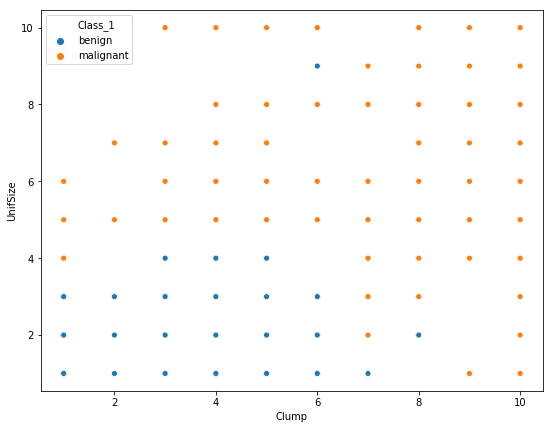

In [45]:
plt.figure (figsize = (9,7))
sns.scatterplot (x = 'Clump', y = 'UnifSize', data = cell_df, hue = "Class_1")
plt.show ()

<Figure size 648x504 with 0 Axes>

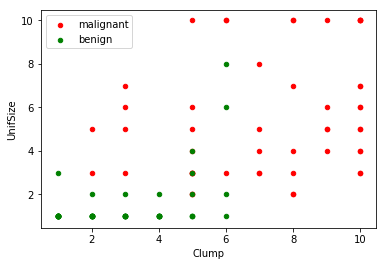

In [50]:
# Another approach
plt.figure (figsize = (9,7))
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='malignant');

cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='green', label='benign', ax=ax);

plt.show()

## Data Pre-processing and selection 

In [51]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
Class_1        object
dtype: object

In [52]:
cell_df = cell_df [pd.to_numeric (cell_df ['BareNuc'], errors = 'coerce').notnull ()]

In [54]:
cell_df ['BareNuc'] = cell_df ['BareNuc'].astype ('int')

In [56]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc         int64
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
Class_1        object
dtype: object

In [57]:
cell_df.corr ()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
ID,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
UnifSize,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
UnifShape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
MargAdh,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
SingEpiSize,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
BareNuc,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
BlandChrom,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
NormNucl,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mit,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


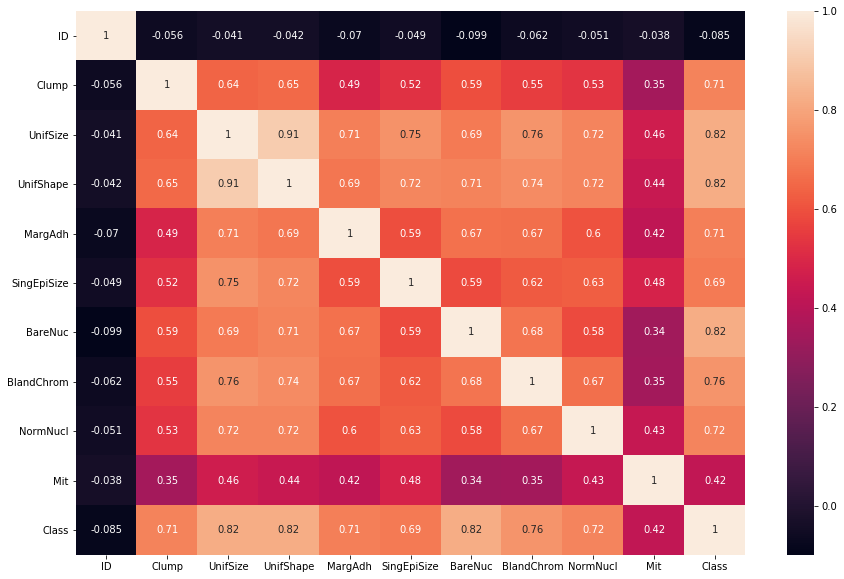

In [58]:
plt.figure (figsize = (15,10))
sns.heatmap (cell_df.corr (), annot = True)
plt.show ()

In [59]:
features_df = cell_df [['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

In [60]:
X = np.asanyarray (features_df)

In [61]:
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [62]:
y = np.asanyarray (cell_df.Class)

In [63]:
y[0:5]

array([2, 2, 2, 2, 2])

## Tain/ Test dataset

In [64]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


## Modeling

In [65]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [66]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

## Evaluation

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
classification_report (y_test, yhat)

'              precision    recall  f1-score   support\n\n           2       1.00      0.94      0.97        90\n           4       0.90      1.00      0.95        47\n\n   micro avg       0.96      0.96      0.96       137\n   macro avg       0.95      0.97      0.96       137\nweighted avg       0.97      0.96      0.96       137\n'

In [70]:
t = confusion_matrix (y_test, yhat)
t

array([[85,  5],
       [ 0, 47]])

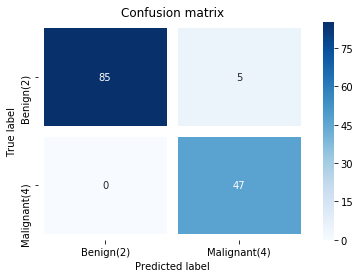

In [81]:
sns.heatmap (t, annot = True, cmap = 'Blues', yticklabels = ['Benign(2)','Malignant(4)'], xticklabels = ['Benign(2)','Malignant(4)'], linewidths = 10)
plt.xlabel ('Predicted label')
plt.ylabel ('True label')
plt.title ('Confusion matrix')
plt.show ()

In [78]:
from sklearn.metrics import f1_score
round (f1_score(y_test, yhat, average='weighted'),2)

0.96

In [79]:
from sklearn.metrics import jaccard_similarity_score
round (jaccard_similarity_score(y_test, yhat),2)

0.96